In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

# Issuance Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an issuance sweep run that compares two parameter sets. 


## Part 1. Running the Simulation

In [2]:
from subspace_model.experiment import issuance_sweep
sim_df = issuance_sweep()

/home/bk/.virtualenvs/subspace/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 48, 30, 33)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 48, 30, 33)


Initializing configurations: 100%|██████████| 30/30 [00:00<00:00, 56.72it/s]

Execution Method: local_simulations
Execution Mode: parallelized



Flattening results: 100%|██████████| 30/30 [00:00<00:00, 49.48it/s]


Total execution time: 157.67s


In [3]:
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

[Text(0.5, 1.0, 'AB Test Circulating Supply')]

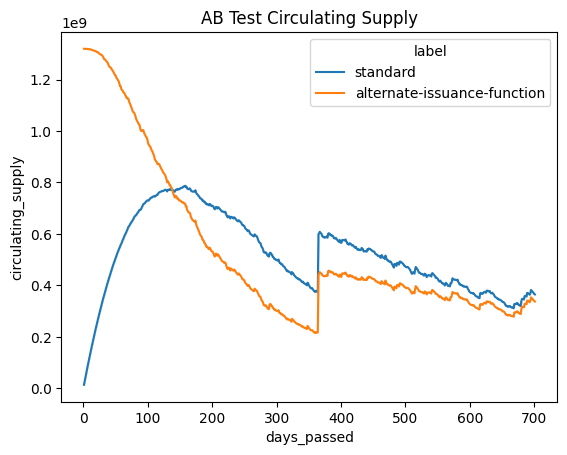

In [9]:
sns.lineplot(sim_df, x="days_passed", y="circulating_supply", hue="label").set(
    title="AB Test Circulating Supply"
)

[Text(0.5, 1.0, 'AB Test Operator Pool Shares')]

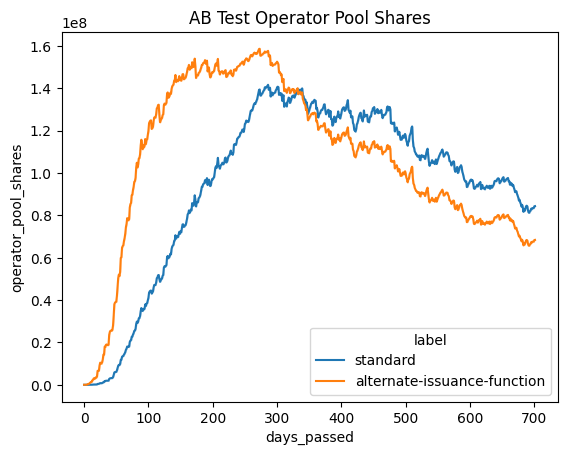

In [11]:
sns.lineplot(sim_df, x="days_passed", y="operator_pool_shares", hue="label").set(
    title="AB Test Operator Pool Shares"
)

[Text(0.5, 1.0, 'AB Test Nominator Pool Shares')]

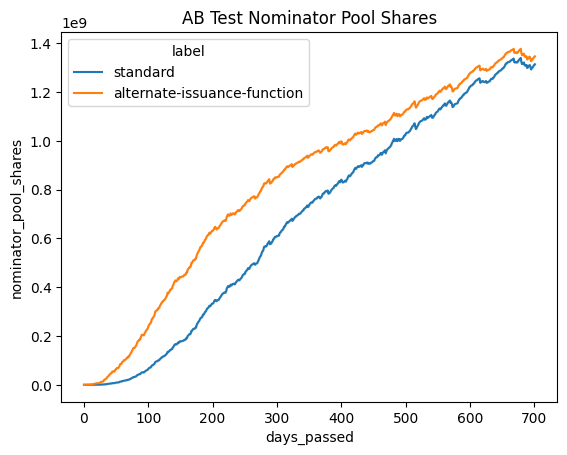

In [12]:
sns.lineplot(sim_df, x="days_passed", y="nominator_pool_shares", hue="label").set(
    title="AB Test Nominator Pool Shares"
)

[Text(0.5, 1.0, 'AB Test Block Utilization')]

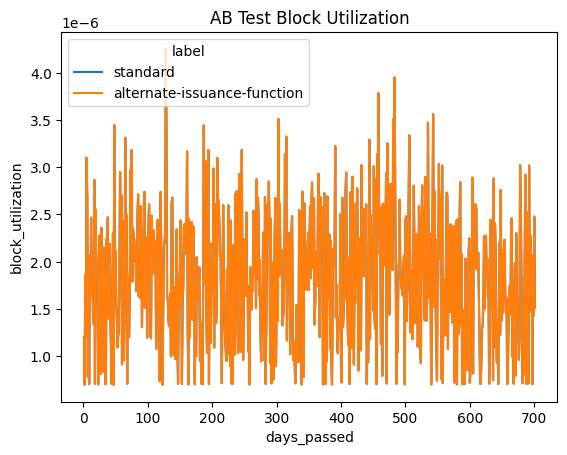

In [13]:
sns.lineplot(sim_df, x="days_passed", y="block_utilization", hue="label").set(
    title="AB Test Block Utilization"
)

[Text(0.5, 1.0, 'AB Test Windowed Volatility of Circulating Supply')]

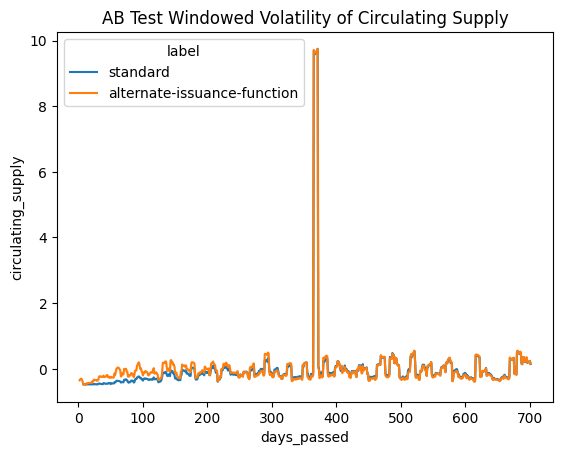

In [10]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.groupby("run"):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x="days_passed", y="circulating_supply", hue="label").set(
    title="AB Test Windowed Volatility of Circulating Supply"
)